# EDA Problem Set 2
**Submitted by: Rosiel Jazmine T. Villareal**

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


## Requirements


>Gotta catch 'em all.

Using the lessons on Logistic Regression, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. How many Legendary Pokemon are there? ( 1pt )

2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )

5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

6. What is the accuracy of your model?( 2pts )

7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )



-----


Bonus 1 : What is the difference between machine learning and pattern recognition? (1pt)

Bonus 2:  Who is your favorite Pokemon?

----

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import metrics

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
df = pd.read_csv("data/Pokemon.csv")

In [4]:
df.head().T

,0,1,2,3,4
Number,1,2,3,4,5
Name,Bulbasaur,Ivysaur,Venusaur,Charmander,Charmeleon
Type_1,Grass,Grass,Grass,Fire,Fire
Type_2,Poison,Poison,Poison,NaN,NaN
Total,318,405,525,309,405
HP,45,60,80,39,58
Attack,49,62,82,52,64
Defense,49,63,83,43,58
Sp_Atk,65,80,100,60,80
Sp_Def,65,80,100,50,65


In [5]:
df.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [6]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


### 1. How many Legendary Pokemon are there? ( 1pt )

In [7]:
df['isLegendary'].value_counts()

False    675
True      46
Name: isLegendary, dtype: int64

There are 46 legendary pokemon in the dataset.

### 2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

In [8]:
df.loc[(df['Attack']/df['HP']).idxmax()]

Number                    292
Name                 Shedinja
Type_1                    Bug
Type_2                  Ghost
Total                     236
HP                          1
Attack                     90
Defense                    45
Sp_Atk                     30
Sp_Def                     30
Speed                      40
Generation                  3
isLegendary             False
Color                   Brown
hasGender               False
Pr_Male                   NaN
Egg_Group_1           Mineral
Egg_Group_2               NaN
hasMegaEvolution        False
Height_m                 0.79
Weight_kg                 1.2
Catch_Rate                 45
Body_Style          head_base
Name: 291, dtype: object

The pokemon with highest attack to HP ratio is Shedinja with an attack to HP ratio of 90.

### 3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

In [9]:
# Check distribution among pokemon types
df['Type_1'].value_counts()

Water       105
Normal       93
Grass        66
Bug          63
Psychic      47
Fire         47
Rock         41
Electric     36
Ground       30
Dark         28
Poison       28
Fighting     25
Dragon       24
Ghost        23
Ice          23
Steel        22
Fairy        17
Flying        3
Name: Type_1, dtype: int64

There are 47 pokemon with Fire as their Type_1.

In [10]:
# Check distribution among pokemon types
df['Type_2'].value_counts()

Flying      87
Poison      31
Ground      30
Psychic     27
Steel       19
Fighting    19
Fairy       18
Grass       18
Dark        16
Rock        14
Dragon      14
Water       13
Ghost       12
Ice         10
Fire         9
Electric     6
Normal       4
Bug          3
Name: Type_2, dtype: int64

There are 9 pokemon with Fire as their Type_2.

Thus, there are 56 Fire type pokemon in total, including the 9 pokemon with dual types.

In [11]:
# Create a binary target variable Is_Fire w/c is True for Fire type pokemon and False otherwise
df.loc[(df['Type_1']=='Fire') | (df['Type_2']=='Fire'), 'Is_Fire'] = 1
df.loc[(df['Type_1']!='Fire') & (df['Type_2']!='Fire'), 'Is_Fire'] = 0
df[['Name', 'Is_Fire']]

,Name,Is_Fire
0,Bulbasaur,0.0
1,Ivysaur,0.0
2,Venusaur,0.0
3,Charmander,1.0
4,Charmeleon,1.0
...,...,...
716,Yveltal,0.0
717,Zygarde,0.0
718,Diancie,0.0
719,Hoopa,0.0


In [12]:
df['Is_Fire'].value_counts()

0.0    665
1.0     56
Name: Is_Fire, dtype: int64

In [13]:
# Compute % null values per feature
df.isnull().sum()/len(df)

Number              0.000000
Name                0.000000
Type_1              0.000000
Type_2              0.514563
Total               0.000000
HP                  0.000000
Attack              0.000000
Defense             0.000000
Sp_Atk              0.000000
Sp_Def              0.000000
Speed               0.000000
Generation          0.000000
isLegendary         0.000000
Color               0.000000
hasGender           0.000000
Pr_Male             0.106796
Egg_Group_1         0.000000
Egg_Group_2         0.735090
hasMegaEvolution    0.000000
Height_m            0.000000
Weight_kg           0.000000
Catch_Rate          0.000000
Body_Style          0.000000
Is_Fire             0.000000
dtype: float64

Maybe Type_2 and Egg_Group_2 are not null only for pokemon with 2 types and 2 egg groups, respectively.

In [14]:
df['Egg_Group_2'].value_counts()

Dragon        35
Grass         32
Field         31
Fairy         17
Water_3       15
Human-Like    15
Water_1       13
Amorphous      8
Mineral        8
Water_2        8
Flying         6
Bug            2
Monster        1
Name: Egg_Group_2, dtype: int64

In [15]:
# List predictor features to include in model by type
cat_feat = ['Body_Style', 'Egg_Group_1', 'Egg_Group_2', 'Color', 'Generation']
num_feat = ['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Height_m', 'Weight_kg', 'Catch_Rate']

In [16]:
# Use one-hot encoding for categorical features
# But drop first column for all encoded categorical since it's redundant

cat = df[cat_feat]

for col in cat_feat:
    if col == 'Egg_Group_2': # add a column to indicate NaN / missing
        cat = cat.join(pd.get_dummies(df[col], prefix=col, drop_first=True, dummy_na=True))
    else:
        cat = cat.join(pd.get_dummies(df[col], prefix=col, drop_first=True))

# Drop original columns for categorical features
cat.drop(cat_feat, axis=1, inplace=True)

In [17]:
cat.columns

Index(['Body_Style_bipedal_tailless', 'Body_Style_four_wings',
       'Body_Style_head_arms', 'Body_Style_head_base', 'Body_Style_head_legs',
       'Body_Style_head_only', 'Body_Style_insectoid',
       'Body_Style_multiple_bodies', 'Body_Style_quadruped',
       'Body_Style_serpentine_body', 'Body_Style_several_limbs',
       'Body_Style_two_wings', 'Body_Style_with_fins', 'Egg_Group_1_Bug',
       'Egg_Group_1_Ditto', 'Egg_Group_1_Dragon', 'Egg_Group_1_Fairy',
       'Egg_Group_1_Field', 'Egg_Group_1_Flying', 'Egg_Group_1_Grass',
       'Egg_Group_1_Human-Like', 'Egg_Group_1_Mineral', 'Egg_Group_1_Monster',
       'Egg_Group_1_Undiscovered', 'Egg_Group_1_Water_1',
       'Egg_Group_1_Water_2', 'Egg_Group_1_Water_3', 'Egg_Group_2_Bug',
       'Egg_Group_2_Dragon', 'Egg_Group_2_Fairy', 'Egg_Group_2_Field',
       'Egg_Group_2_Flying', 'Egg_Group_2_Grass', 'Egg_Group_2_Human-Like',
       'Egg_Group_2_Mineral', 'Egg_Group_2_Monster', 'Egg_Group_2_Water_1',
       'Egg_Group_2_Water_2',

In [18]:
# Scale numerical features
num = pd.DataFrame(StandardScaler().fit_transform(df[num_feat]), columns=num_feat)
num

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Catch_Rate
0,-0.912018,-0.905138,-0.898134,-0.744925,-0.129931,-0.158953,-0.759906,-0.416789,-0.560162,-0.721989
1,-0.118133,-0.324426,-0.449306,-0.266721,0.391481,0.396662,-0.209629,-0.148498,-0.491649,-0.721989
2,0.976881,0.449857,0.241197,0.416427,1.086697,1.137482,0.524073,0.828847,0.485508,-0.721989
3,-0.994145,-1.137423,-0.794558,-0.949869,-0.303735,-0.714567,-0.026204,-0.512607,-0.542191,-0.721989
4,-0.118133,-0.401854,-0.380256,-0.437508,0.391481,-0.158953,0.524073,-0.052680,-0.424258,-0.721989
...,...,...,...,...,...,...,...,...,...,...
716,2.391275,2.230709,1.932931,0.826315,2.164282,1.063400,1.221091,4.450771,1.642371,-0.721989
717,1.661266,1.533854,0.862651,1.714408,0.426242,0.952277,1.074350,3.693808,2.788003,-1.270862
718,1.661266,-0.711567,0.862651,2.704972,1.086697,2.989532,-0.576481,-0.416789,-0.538822,-1.270862
719,1.661266,0.449857,1.207902,-0.369194,2.824737,2.248712,0.157222,-0.608425,-0.536575,-1.270862


In [19]:
num.join(cat).columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed',
       'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style_bipedal_tailless',
       'Body_Style_four_wings', 'Body_Style_head_arms', 'Body_Style_head_base',
       'Body_Style_head_legs', 'Body_Style_head_only', 'Body_Style_insectoid',
       'Body_Style_multiple_bodies', 'Body_Style_quadruped',
       'Body_Style_serpentine_body', 'Body_Style_several_limbs',
       'Body_Style_two_wings', 'Body_Style_with_fins', 'Egg_Group_1_Bug',
       'Egg_Group_1_Ditto', 'Egg_Group_1_Dragon', 'Egg_Group_1_Fairy',
       'Egg_Group_1_Field', 'Egg_Group_1_Flying', 'Egg_Group_1_Grass',
       'Egg_Group_1_Human-Like', 'Egg_Group_1_Mineral', 'Egg_Group_1_Monster',
       'Egg_Group_1_Undiscovered', 'Egg_Group_1_Water_1',
       'Egg_Group_1_Water_2', 'Egg_Group_1_Water_3', 'Egg_Group_2_Bug',
       'Egg_Group_2_Dragon', 'Egg_Group_2_Fairy', 'Egg_Group_2_Field',
       'Egg_Group_2_Flying', 'Egg_Group_2_Grass', 'Egg_Group_2_Human-L

In [20]:
# Join numeric & categorical features & set target variable 'Is_Fire'
X = num.join(cat)

# Include the 2 bool features w/c were not preprocessed
X = X.join(df[['hasMegaEvolution', 'isLegendary']])
y = df['Is_Fire']

X.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Catch_Rate,...,Color_Red,Color_White,Color_Yellow,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,hasMegaEvolution,isLegendary
0,-0.912018,-0.905138,-0.898134,-0.744925,-0.129931,-0.158953,-0.759906,-0.416789,-0.560162,-0.721989,...,0,0,0,0,0,0,0,0,False,False
1,-0.118133,-0.324426,-0.449306,-0.266721,0.391481,0.396662,-0.209629,-0.148498,-0.491649,-0.721989,...,0,0,0,0,0,0,0,0,False,False
2,0.976881,0.449857,0.241197,0.416427,1.086697,1.137482,0.524073,0.828847,0.485508,-0.721989,...,0,0,0,0,0,0,0,0,True,False
3,-0.994145,-1.137423,-0.794558,-0.949869,-0.303735,-0.714567,-0.026204,-0.512607,-0.542191,-0.721989,...,1,0,0,0,0,0,0,0,False,False
4,-0.118133,-0.401854,-0.380256,-0.437508,0.391481,-0.158953,0.524073,-0.052680,-0.424258,-0.721989,...,1,0,0,0,0,0,0,0,False,False


In [21]:
# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=18)

# Fit logistic regression on train set
log_reg = LogisticRegression(random_state=18,
                            class_weight='balanced') # weights adjusted so they are inversely proportional to class frequencies
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94       133
         1.0       0.44      0.92      0.59        12

    accuracy                           0.90       145
   macro avg       0.72      0.91      0.77       145
weighted avg       0.95      0.90      0.91       145



In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.896551724137931
Precision: 0.44
Recall: 0.9166666666666666


- For predicting fire type: the model has an f1-score of 59%; a precision of 44%; and a recall of 92%
- For predicting non-fire type: the model has an f1-score of 94%; a precision of 99%; and a recall of 89%
- Overall: accuracy of 89.7%, precision of 44%, and recall of 91.7%

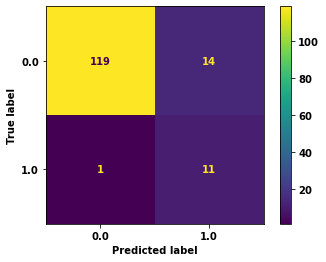

In [23]:
metrics.plot_confusion_matrix(log_reg, X_test, y_test)

#### 4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )

In [24]:
legendary = df.loc[df['isLegendary']==True]

In [25]:
legendary.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
Is_Fire             float64
dtype: object

***Stats of legendary pokemon***

In [26]:
legendary.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate,Is_Fire
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,6.00000,46.000000,46.000000,46.000000,46.000000
mean,468.652174,620.217391,94.000000,108.608696,101.586957,113.891304,106.543478,95.586957,3.782609,0.75000,2.449565,201.797826,6.652174,0.152174
std,175.654107,44.993290,18.808981,23.536712,26.525104,25.432462,27.236174,20.436977,1.474420,0.41833,1.723660,197.172328,11.965167,0.363158
min,144.000000,580.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,1.000000,0.00000,0.200000,0.300000,3.000000,0.000000
25%,379.250000,580.000000,80.000000,90.000000,90.000000,96.250000,90.000000,90.000000,3.000000,0.62500,1.500000,56.550000,3.000000,0.000000
50%,483.500000,600.000000,91.000000,107.500000,100.000000,117.500000,100.000000,99.000000,4.000000,1.00000,1.960000,196.500000,3.000000,0.000000
75%,640.750000,677.500000,103.750000,123.750000,118.750000,130.000000,120.000000,108.000000,5.000000,1.00000,3.200000,293.750000,3.000000,0.000000
max,721.000000,720.000000,150.000000,160.000000,200.000000,154.000000,200.000000,150.000000,6.000000,1.00000,7.010000,950.000000,45.000000,1.000000


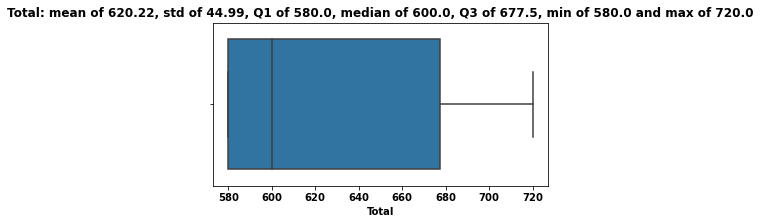

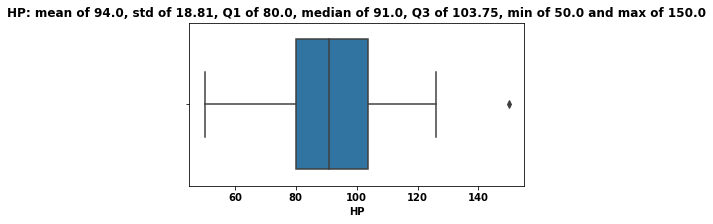

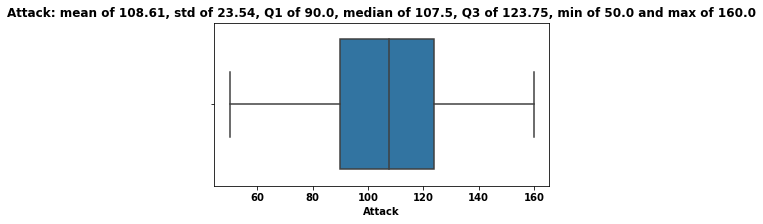

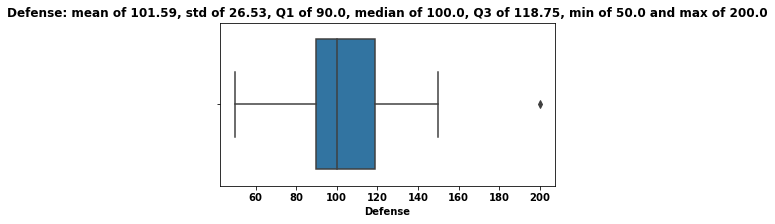

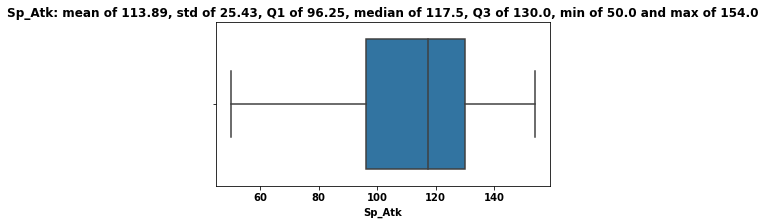

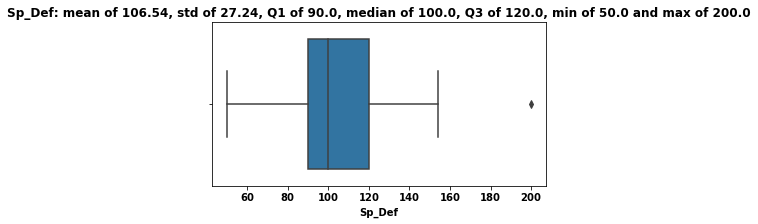

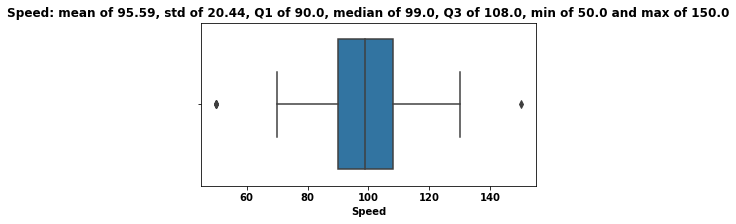

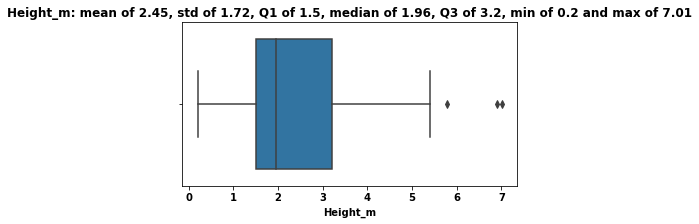

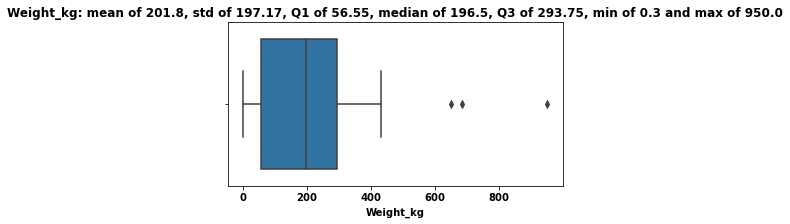

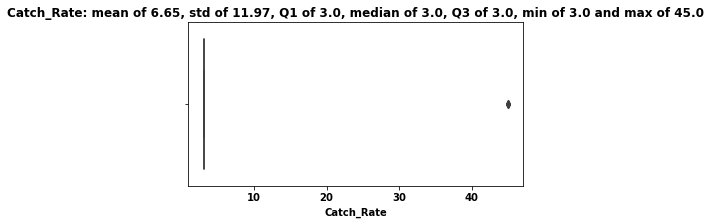

In [27]:
num_feat = ['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Height_m', 'Weight_kg', 'Catch_Rate']

for i in num_feat:
    _dict = legendary[i].describe().to_dict()
    title = f"{i}: mean of {np.round(_dict['mean'], 2)}, std of {np.round(_dict['std'], 2)}, "\
            f"Q1 of {_dict['25%']}, median of {_dict['50%']}, Q3 of {_dict['75%']}, "\
            f"min of {_dict['min']} and max of {_dict['max']}"
    plt.figure(i, figsize=(6,3))
    plt.title(title, loc='center')
    sns.boxplot(x=legendary[i])

***Attributes of legendary pokemon***

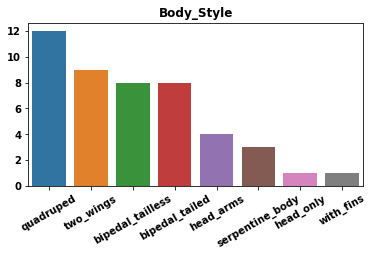

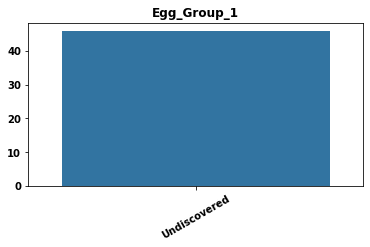

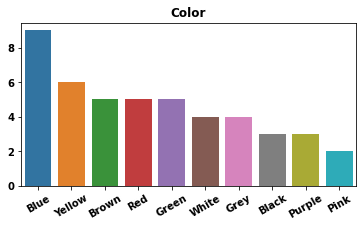

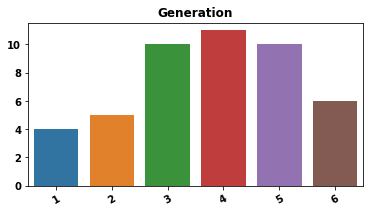

In [28]:
cat_feat = ['Body_Style', 'Egg_Group_1', 'Color', 'Generation']

for i in cat_feat:
    plt.figure(i, figsize=(6,3))
    plt.tight_layout()
    ax = sns.barplot(x=legendary[i].value_counts().index, y=legendary[i].value_counts().values)
    ax.tick_params(axis='x', rotation=30)
    ax.set_title(i)

### 5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

In [29]:
# Predict pokemon is fire type (1) or not (0)
pred = log_reg.predict(X)

# Predict probability pokemon is fire type
prob = [x[1] for x in log_reg.predict_proba(X)]

In [30]:
df['pred'] = pred
df['prob_is_fire'] = prob
df[['Name', 'Is_Fire', 'pred', 'prob_is_fire']]

,Name,Is_Fire,pred,prob_is_fire
0,Bulbasaur,0.0,0.0,0.076633
1,Ivysaur,0.0,0.0,0.058905
2,Venusaur,0.0,0.0,0.022427
3,Charmander,1.0,1.0,0.905871
4,Charmeleon,1.0,1.0,0.886434
...,...,...,...,...
716,Yveltal,0.0,1.0,0.719613
717,Zygarde,0.0,0.0,0.003130
718,Diancie,0.0,0.0,0.166484
719,Hoopa,0.0,1.0,0.508914


The probability that each pokemon is fire is given in the column ``prob_is_fire``.

### 6. What is the accuracy of your model?( 2pts )

In [31]:
# Accuracy on test set
metrics.accuracy_score(y_test, y_pred)

0.896551724137931

The model has an accuracy of 89.7% on the test set.

In [32]:
# Accuracy on whole dataset
metrics.accuracy_score(df['Is_Fire'], df['pred'])

0.9056865464632455

The model has an accuracy of 90.6% on the whole dataset.

### 7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )

In [33]:
X = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
not_fire = X[X['Is_Fire']==False]
fire = X[X['Is_Fire']==True]

In [34]:
X.head()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Catch_Rate,...,Color_White,Color_Yellow,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,hasMegaEvolution,isLegendary,Is_Fire
351,0.201246,-0.324426,0.517399,-0.027620,-0.303735,1.878302,-0.943332,-0.148498,-0.390563,1.303615,...,0,0,0,1,0,0,0,False,False,0.0
131,-1.185772,-0.788996,-0.932659,-0.779082,-0.720865,-0.788649,-0.649851,-0.809643,-0.592734,-0.852673,...,0,0,0,0,0,0,0,False,False,0.0
198,0.657502,1.030570,-0.000479,0.313954,1.086697,1.507892,-1.310183,0.828847,0.255258,-0.395279,...,0,0,1,0,0,0,0,False,False,0.0
442,-1.076271,-0.401854,-0.173105,-0.881555,-0.998951,-0.899772,-0.869962,-0.416789,-0.407411,-0.721989,...,0,0,0,0,1,0,0,False,False,0.0
80,-0.848143,-1.679421,-1.381486,-0.027620,0.912893,-0.529362,-0.759906,-0.809643,-0.570270,1.172931,...,0,0,0,0,0,0,0,False,False,0.0


In [35]:
# upsample minority
fire_upsampled = resample(fire,
                          replace=True, # sample with replacement
                          n_samples=len(not_fire), # match number in majority class
                          random_state=18) # reproducible results

# combine majority and upsampled minority
fire_upsampled = pd.concat([not_fire, fire_upsampled])

# check new class counts
fire_upsampled['Is_Fire'].value_counts()

1.0    532
0.0    532
Name: Is_Fire, dtype: int64

In [36]:
X_train = fire_upsampled.drop('Is_Fire', axis=1)
y_train = fire_upsampled['Is_Fire']

# Fit logistic regression on train set
log_reg = LogisticRegression(random_state=18, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Predict on test set
upsampled_pred = log_reg.predict(X_test)

print(metrics.classification_report(y_test, upsampled_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95       133
         1.0       0.50      0.92      0.65        12

    accuracy                           0.92       145
   macro avg       0.75      0.92      0.80       145
weighted avg       0.95      0.92      0.93       145



In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, upsampled_pred))
print("Precision:",metrics.precision_score(y_test, upsampled_pred))
print("Recall:",metrics.recall_score(y_test, upsampled_pred))

Accuracy: 0.9172413793103448
Precision: 0.5
Recall: 0.9166666666666666


Before upsampling:
- For predicting fire type: the model has an f1-score of 59%; a precision of 44%; and a recall of 92%
- For predicting non-fire type: the model has an f1-score of 94%; a precision of 99%; and a recall of 89%
- Overall: accuracy of 89.7%, precision of 44%, and recall of 91.7%

After upsampling:
- For predicting fire type: the model has an f1-score of 65% (up by 6%); a precision of 50% (up by 6%); and a recall of 92% (same)
- For predicting non-fire type: the model has an f1-score of 95% (up by 1%); a precision of 99% (same); and a recall of 92% (up by 3%)
- Overall: accuracy of 91.7% (up by 2%), precision of 50% (up by 6%), and recall of 91.7% (same)
- Thus, upsampling fire type pokemon improved classification performance

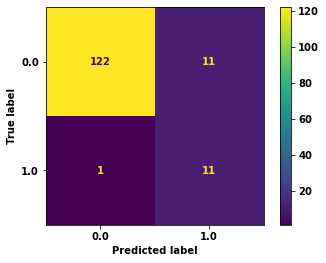

In [38]:
metrics.plot_confusion_matrix(log_reg, X_test, y_test)

### Bonus 1 : What is the difference between machine learning and pattern recognition? (1pt)
Pattern recognition focuses on automated discovery of patterns and regularities in data. Machine learning is just one approach that can be used for pattern recognition. Machine learning focuses on computer algorithms learning through experience using data.

### Bonus 2:  Who is your favorite Pokemon?

In [40]:
df.loc[df['Name']=='Pikachu'].T

,24
Number,25
Name,Pikachu
Type_1,Electric
Type_2,NaN
Total,320
HP,35
Attack,55
Defense,40
Sp_Atk,50
Sp_Def,50
